In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import curve_fit


Question 1: 

a) varying inlcinations, a=6R, v=~1.0954 (corresponding to e=0.21), see how OE's dW and dw vary as a result.


PREDICTION: Based on perturbations handout, the dW curve should follow a cosine, while dw should follow a 2-sin**2(x)

In [2]:
i1a = [0,15,30,45,60,75,90]
dw1a  = [3.4,6.1,4.8,2.6,0.42,-1.1,-1.7]
dW1a = [0,-3.4,-3,-2.4,-1.7,-0.9,0] #note weirdness happens at i=0! Going to look more into this in 1b...




Based on handout, these trends should correspond to sines and cosines, plus some initial parameter depending on J2, other OE's, etc. Rather than derive all of that, I'm going to use the max value of this function as its amplitude, and see how well this fit works.  

In [3]:
test = np.linspace(0,90,41)
dw1afit = [] 
dW1afit = [] 
for i in range(len(test)):
    dw1afit.append(dw1a[0]*(2-2.5*pow(np.sin(np.deg2rad(test[i])),2)))
    dW1afit.append(dW1a[1]*np.cos(np.deg2rad(test[i])))


<IPython.core.display.Javascript object>


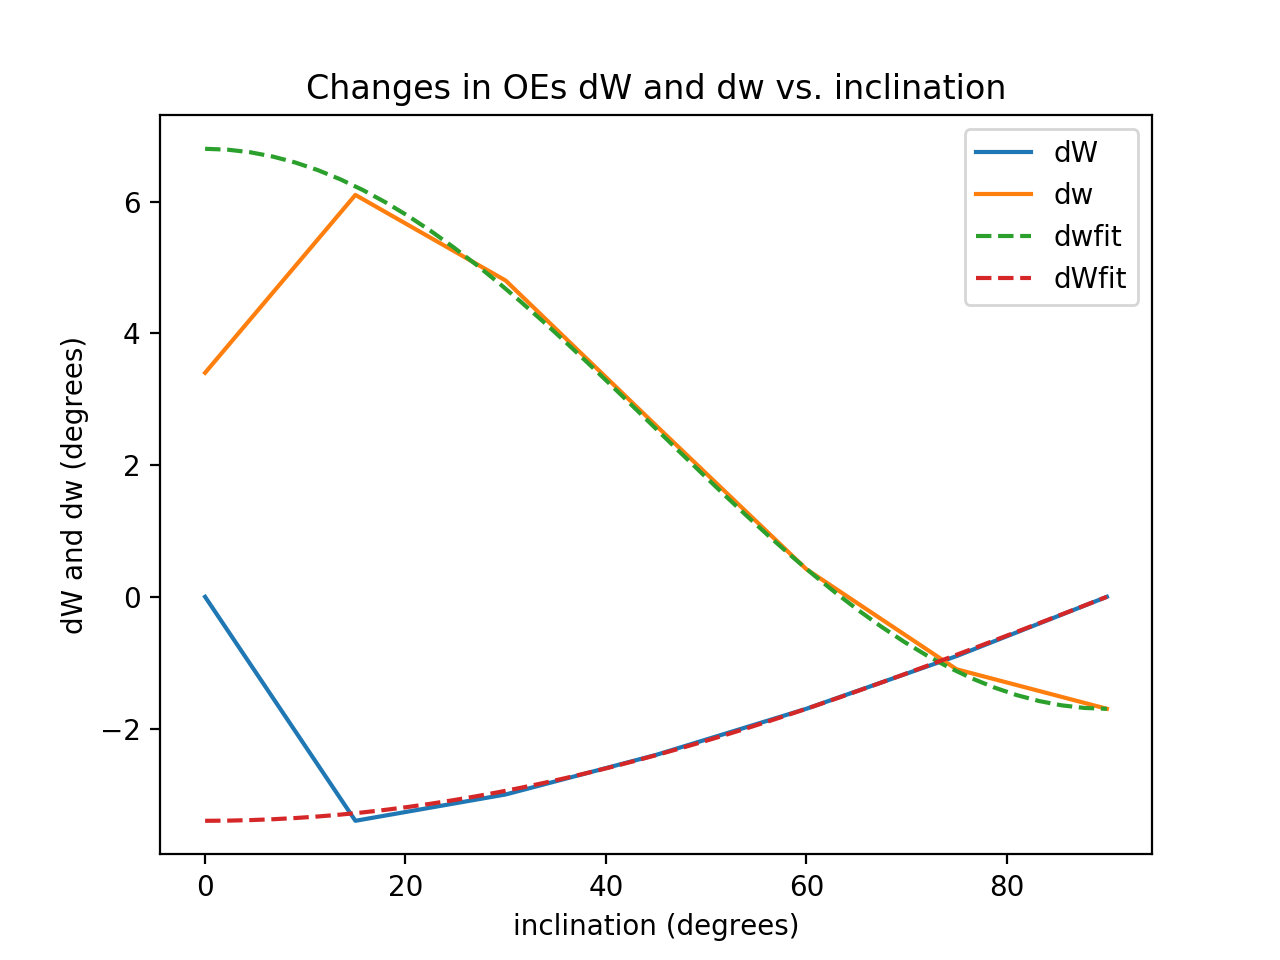

In [4]:
plt.figure()
plt.plot(i1a,dW1a,label='dW')
plt.plot(i1a,dw1a,label='dw')
plt.plot(test,dw1afit,'--',label='dwfit')
plt.plot(test,dW1afit,'--',label='dWfit')

plt.legend()
plt.title('Changes in OEs dW and dw vs. inclination')
plt.xlabel('inclination (degrees)')
plt.ylabel('dW and dw (degrees)')

Aside from the weirdness at the beginning, these fits are extremely close and at least from a qualitative standpoint, the expressions derived in class.

1b) See attached for plots demonstrating this, but the effects from having orbits as e->0 and i->0 is that the orbital elements w and W are undefined for circular and equatorial orbits, so changes to these orbital elements for extremely close to 0 eccentricities and inclinations cause ill defined behavior. The plot attached for a nearly equatorial orbit (i=0.001°). shows that dW varies by about 3°. This corresponds to the fit model, but as soon as i=0°, dW=0. 


As for nearly circular orbits, both dw and dW behave weirdly. In particular, dw oscillates very quickly between + and - 180, making it very difficult to analyze what exactly is happening to w over the course of a nearly circular orbit. 

See attached for 1c. 

Question 2: 

a) With solely equatorial bulge influence, testing how a satellite around Earth w/ e=0.21 and i=30° responds along W and w depending on its radius a. 

PREDICTION: stronger effects at closer orbits. 

In [5]:
 def func(x, ao, b):
        #this is a rough drawing of the function given in the perturbations handout. I only care about the varying rad
        #radius a (a=x in this function) where ao absorbs all the other parameters, and b is the degree of 
        return ao*(x**b)   

In [6]:
#Question 2

a = [6,10,15,25,30]  #orbital radii I'm sampling. 
dwbulge = [4.8,.8,.19,.03,.017]   #final - initial on plot (same procedure for all of these arrays).
dwbparams, dwbconf = curve_fit(func, a, dwbulge) 
dWbulge = [-3,-.5,-.12,-.02,-.015]
dWbparams, dWbconf = curve_fit(func, a, dWbulge) 

vals = np.linspace(5.5,31,30)
dwbulgefit = []
dWbulgefit = []

for i in range(len(vals)):
    dwbulgefit.append(func(vals[i],dwbparams[0],dwbparams[1]))
    dWbulgefit.append(func(vals[i],dWbparams[0],dWbparams[1]))

print("Using curve fitting, the approximate a^n dependence of w and W due to oblateness is a^" + str(dWbparams[1]+1.5)+ " for W, ans a^" +str(dwbparams[1])+ " for w." )

Using curve fitting, the approximate a^n dependence of w and W due to oblateness is a^-2.00748047088 for W, ans a^-3.51068959447 for w.


<IPython.core.display.Javascript object>


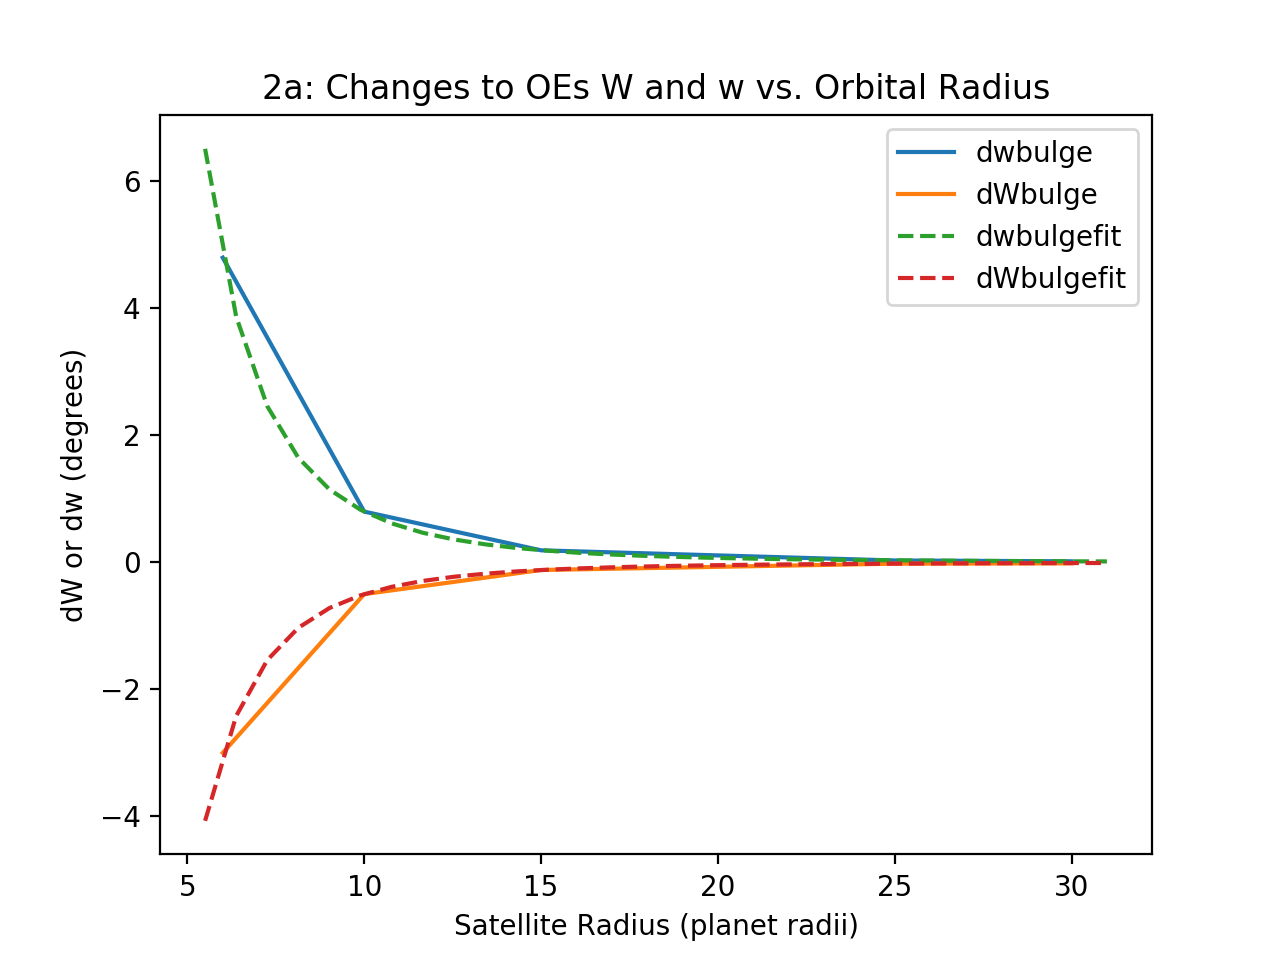

In [7]:
plt.figure()
plt.plot(a,dwbulge,label='dwbulge')
plt.plot(a,dWbulge,label='dWbulge')
plt.plot(vals,dwbulgefit,'--',label='dwbulgefit')
plt.plot(vals,dWbulgefit,'--',label='dWbulgefit')
plt.title('2a: Changes to OEs W and w vs. Orbital Radius')
plt.xlabel('Satellite Radius (planet radii)')
plt.ylabel('dW or dw (degrees)')
plt.legend()

2b) Same procedure as 2a, but now with influences due to solar gravity, not planetary oblateness.

PREDICTION: Since the Sun is further away than the planet, the effects due to solar gravity will be more exxagerated for larger values of a. 

In [8]:
a = [6,10,15,25,30]
dwsun = [.8,1.8,3.4,8.5,11]
dWsun = [-.921,-2,-3.6,-8,-10]
dwsparams, dwsconf = curve_fit(func, a, dwsun) 
dWsparams, dWsconf = curve_fit(func, a, dWsun) 
vals = np.linspace(5.5,31,30)
dwsunfit = []
dWsunfit = []

for i in range(len(vals)):
    dwsunfit.append(func(vals[i],dwsparams[0],dwsparams[1]))
    dWsunfit.append(func(vals[i],dWsparams[0],dWsparams[1]))

print("Using curve fitting, the approximate a^n dependence of w and W due to oblateness is a^" + str(dWsparams[1]+1.5)+ " for W, ans a^" +str(dwsparams[1])+ " for w." )

Using curve fitting, the approximate a^n dependence of w and W due to oblateness is a^2.96343529133 for W, ans a^1.64989029756 for w.


<IPython.core.display.Javascript object>


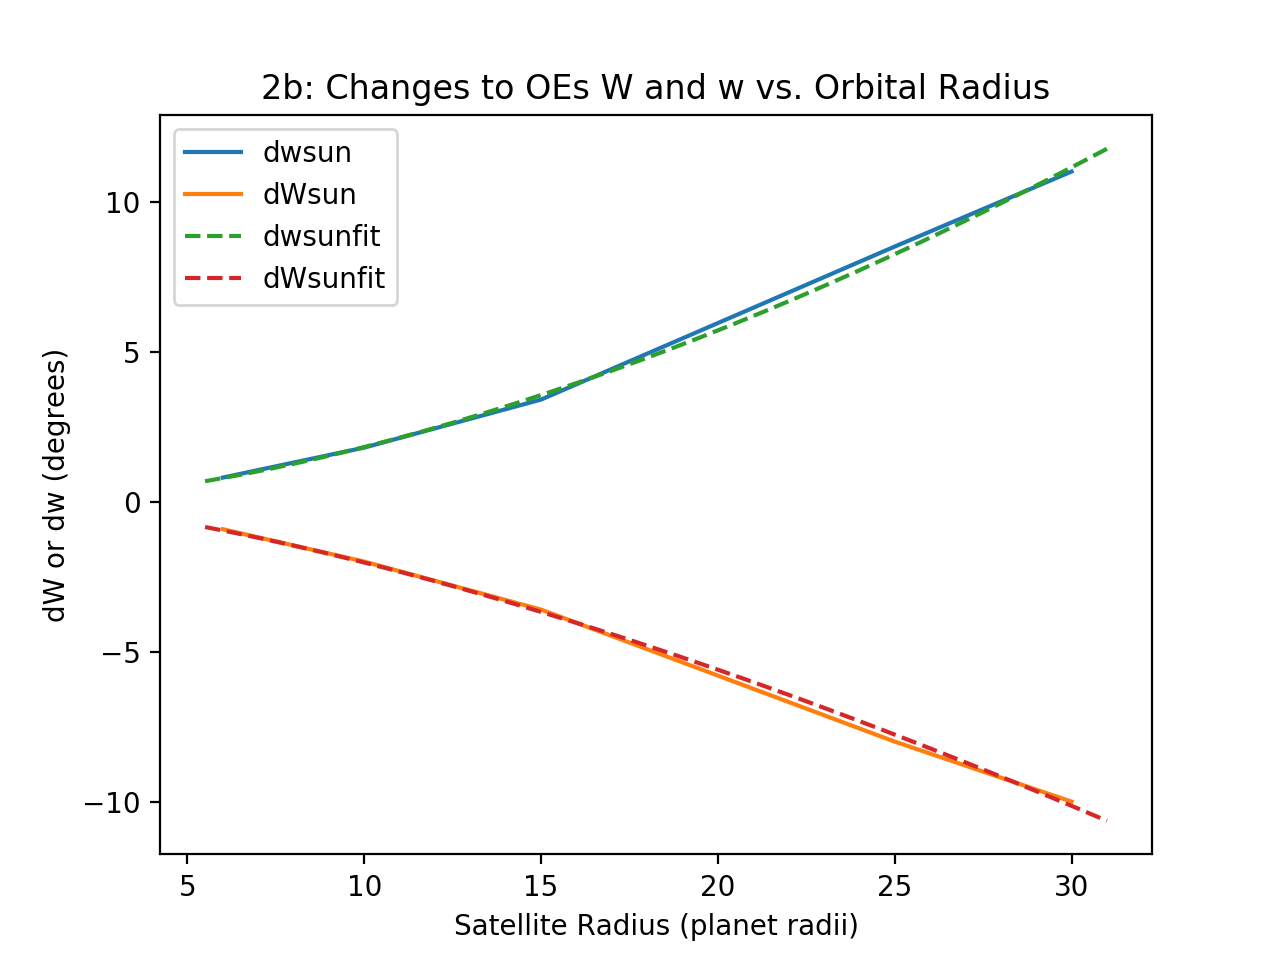

In [9]:
plt.figure()
plt.plot(a,dwsun,label='dwsun')
plt.plot(a,dWsun,label='dWsun')
plt.plot(vals,dwsunfit,'--',label='dwsunfit')
plt.plot(vals,dWsunfit,'--',label='dWsunfit')
plt.title('2b: Changes to OEs W and w vs. Orbital Radius')
plt.xlabel('Satellite Radius (planet radii)')
plt.ylabel('dW or dw (degrees)')
plt.legend()

2c) Now include both perturbations, both solar gravity and planetary oblateness, and observe the changes in W and w as a function of a. 

PREDICTION: The changes will be weakest in the middle, around 15 planetary radii. There will be strong influence closer to the planet due to the oblateness, and strong influence further away due to the Sun. 

In [10]:
aboth = [6,10,20,30]  #sampling a diff. range now of a's so defining it slightly differently. 
dwboth = [5.5,3.5,6,10]
dWboth = [-4,-2.5,-5.5,-10.5] 

<IPython.core.display.Javascript object>


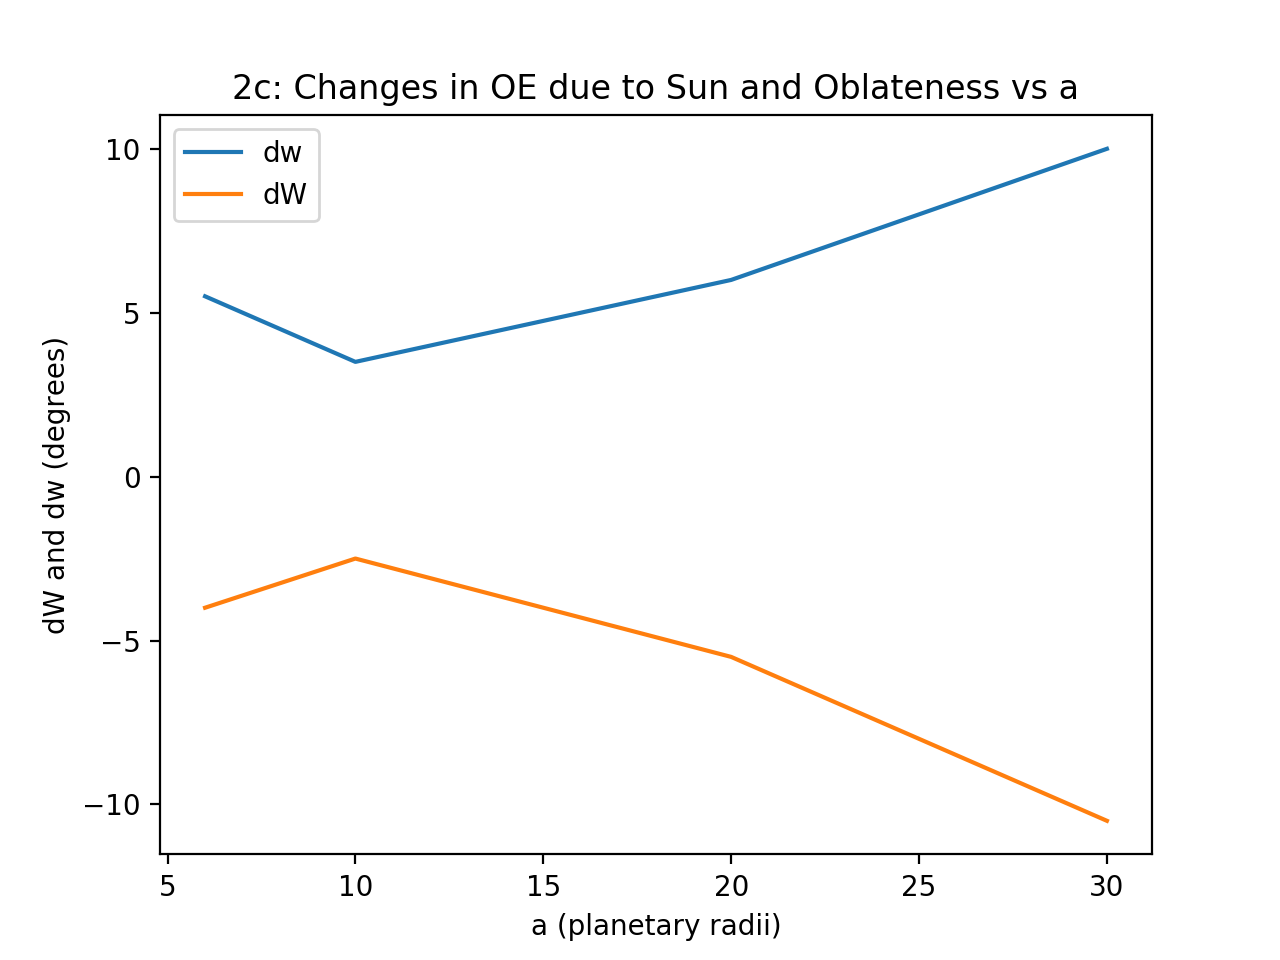

In [11]:
plt.figure()
plt.plot(aboth,dwboth,label='dw')
plt.plot(aboth,dWboth,label='dW')
plt.legend()
plt.title('2c: Changes in OE due to Sun and Oblateness vs a')
plt.xlabel('a (planetary radii)')
plt.ylabel('dW and dw (degrees)')

This plot is consistent with my prediction. There is a bump because of the planetary oblateness for small a's, and there is a slight dip in these effects since neither planetary oblateness or solar gravity is particularly strong, and then once a is large enough the perturbations due to solar gravity dominates. 

In [14]:
72*(1-.21**2)**2

65.78962632

In [15]:
65.78962632/3

21.92987544

In [16]:
np.deg2rad(13)

0.22689280275926285

In [17]:
525600*60

31536000

In [19]:
0.22689280275926285*21.92987544/31536000

1.577793918931736e-07

In [25]:
np.cos(np.deg2rad(70.08))

0.34070775194395159

In [26]:
1.577793918931736e-07/0.34070775194395159

4.6309304966776694e-07

In [22]:
nJ2=4.6309304966776694e-7